In [2]:
import os
import re
import tqdm
import random
import unidecode
import numpy as np
import matplotlib.pyplot as plt

Files

In [3]:
scripts_dir = "/data/sbaruah/narrative_understanding/chatter/scripts/"
scene_regex = re.compile(r"S+[^S]+")
scene_texts, scene_sizes = [], []

for imdb_id in tqdm.tqdm(os.listdir(scripts_dir)):
    script_file = os.path.join(scripts_dir, imdb_id, "script.txt")
    parse_file = os.path.join(scripts_dir, imdb_id, "parse.txt")

    if os.path.exists(script_file) and os.path.exists(parse_file):
        with open(script_file) as f1, open(parse_file) as f2:
            script_lines = f1.read().strip().split("\n")
            parse_tags = f2.read().strip().split("\n")
            assert len(script_lines) == len(parse_tags)
        
        for match in re.finditer(scene_regex, "".join(parse_tags)):
            start, end = match.span(0)
            segments, segment_tags = [], []

            i = start
            while i < end:
                j = i + 1
                while j < end and parse_tags[j] == parse_tags[i]:
                    j += 1
                segment = " ".join(script_lines[i: j])
                segment = re.sub("\s+", " ", segment.strip())
                segment = unidecode.unidecode(segment, errors="ignore")
                segments.append(segment)
                segment_tags.append(parse_tags[i])
                i = j

            scene_segments = []
            i = 0
            while i < len(segments):
                if segment_tags[i] == "C":
                    speaker = segments[i]
                    j = i + 1
                    utterance_with_expr = []
                    while j < len(segments) and segment_tags[j] in ["E", "D"]:
                        segment = segments[j]
                        if segment_tags[j] == "E" and not segment.startswith("("):
                            segment = f"({segment})"
                        utterance_with_expr.append(segment)
                        j += 1
                    utterance_with_expr = " ".join(utterance_with_expr)
                    utterance_with_expr = re.sub("\s+", " ", utterance_with_expr.strip())
                    scene_segment = f"{speaker} says \"{utterance_with_expr}\""
                    scene_segments.append(scene_segment)
                    i = j
                else:
                    scene_segments.append(segments[i])
                    i += 1

            scene_text = "\n".join(scene_segments)
            scene_size = len(re.split("\w+", scene_text))
            scene_texts.append(scene_text)
            scene_sizes.append(scene_size)

print(f"{len(scene_texts)} scenes")

100%|██████████| 2660/2660 [00:59<00:00, 44.42it/s]

277873 scenes


scene size =>
min = 2, max = 48499, mean = 225.1, std = 489.38
median = 101.0, 75%tile = 251.0, 90%tile = 517.0


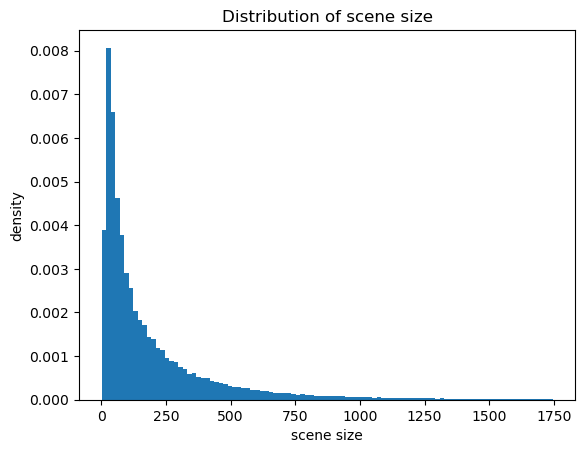

In [4]:
scene_sizes = np.array(scene_sizes)
print("scene size =>")
print(f"min = {np.min(scene_sizes)}, max = {np.max(scene_sizes)}, mean = {np.mean(scene_sizes):.1f}, "
      f"std = {np.std(scene_sizes):.2f}")
print(f"median = {np.median(scene_sizes)}, 75%tile = {np.quantile(scene_sizes, 0.75):.1f}, "
      f"90%tile = {np.quantile(scene_sizes, 0.9):.1f}")
scene_sizes_filtered = scene_sizes[scene_sizes < np.quantile(scene_sizes, 0.99)]
plt.hist(scene_sizes_filtered, bins=100, density=True)
plt.xlabel("scene size")
plt.ylabel("density")
plt.title("Distribution of scene size")
plt.show()

In [5]:
print(random.choice(scene_texts))

151 EXT. ELLIS' HOUSEBOAT - CONTINUOUS 151

Carver steps across the plank onto the houseboat followed by James. Carver motions him around back toward Ellis' window.

CARVER says "Flush him out this way. Carver walks to the covered carport."

